## Comparing the effect of different input features

We trained models with different input features (e.g. different sequence lengths or without the HL time features). Here, we plot these results (Figure S5).

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import time as tm


In [2]:
def get_corr(filename):
    '''
    In this function we find the best run for every fold.
    
    method: do we want the best predictions or the mean of the five folds?
    '''
    
    # Find number of cell population in the data
    file = filename + '0/logs_dir0/results_testdata_best.pkl'
    y = pd.read_pickle(file)
    y_true = np.asarray(y['y_true'])
    num_cp = np.shape(y_true)[1]
    
    corr_test = np.zeros((20, num_cp))
        
    # Iterate over the models
    for i in range(0,20):
        max_corr = 0
        idx = -1
        
        # Iterate over the 5 runs per model
        y_pred = 0
            
        for k in range(5):
            file = filename + str(i) + '/logs_dir' + str(k) + '/results_testdata_best.pkl'
            y = pd.read_pickle(file)
            y_true = np.asarray(y['y_true'])

            if np.var(np.asarray(y['y_pred'])[:,0]) < 1e-5:
                print(filename)
                print(i)
                print(k)


            y_pred = y_pred + np.asarray(y['y_pred'])/5
        
        correlations=pd.DataFrame(np.hstack((y_true, y_pred))).corr().iloc[:num_cp,num_cp:]
        corr_test[i] = np.diag(correlations.values)
                
    return corr_test

#### FACS-sorted Smart-seq2

In [3]:
tissues = ['gland', 'lung', 'muscle', 'marrow', 'spleen']

corr_input = pd.DataFrame(np.zeros((0,3)), columns=['tissue','input','med_corr'])
corr_input = corr_input.astype({"tissue": str, "input": str})

for t in tissues:
    
    fn = '../../Zenodo/mouse/TM_FACS_SM2/' + t + '/cp_specific/input_features/'
    
    test_hl = get_corr(fn + '/hl')        
    test_5_5 = get_corr(fn + '/seq_500_500')
    test_10_10 = get_corr(fn + '/seq_1000_1000')
    test_35_35 = get_corr(fn + '/seq_3500_3500')
    test_70_35 = get_corr(fn + '/seq_7000_3500')
    test_100_50 = get_corr(fn + '/seq_10000_5000')
    test_70_35_hl = get_corr('../../Zenodo/mouse/TM_FACS_SM2/' + t + '/cp_specific/logmean_zscore_multitask_')

    corr_ = pd.DataFrame(np.zeros((np.shape(test_hl)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'HL'
    corr_['med_corr'].values[:] = np.median(test_hl, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_5_5)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (0.5-0.5kb)'
    corr_['med_corr'].values[:] = np.median(test_5_5, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_10_10)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (1-1kb)'
    corr_['med_corr'].values[:] = np.median(test_10_10, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_35_35)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t 
    corr_['input'].values[:] = 'Seq (3.5-3.5kb)'
    corr_['med_corr'].values[:] = np.median(test_35_35, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_70_35)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (7-3.5kb)'
    corr_['med_corr'].values[:] = np.median(test_70_35, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_100_50)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (10-5kb)'
    corr_['med_corr'].values[:] = np.median(test_100_50, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_70_35_hl)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (7-3.5kb) + HL'
    corr_['med_corr'].values[:] = np.median(test_70_35_hl, axis=0)
    corr_input = pd.concat([corr_input, corr_])


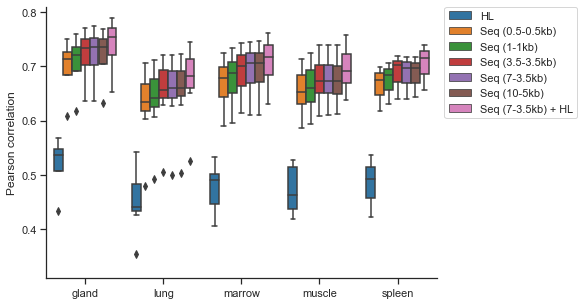

In [4]:
matplotlib.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks")
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=[7,5])
g = sns.boxplot(data = corr_input, x='tissue', y='med_corr', hue='input',
           order=['gland', 'lung', 'marrow',
                  'muscle', 'spleen']
           )
sns.despine()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim([0.31,0.81])
plt.xlabel('')
plt.ylabel('Pearson correlation')
plt.show()

#### 10X

In [5]:
tissues = ['gland', 'lung', 'muscle', 'marrow', 'spleen']

corr_input = pd.DataFrame(np.zeros((0,3)), columns=['tissue','input','med_corr'])
corr_input = corr_input.astype({"tissue": str, "input": str})

for t in tissues:
    
    fn = '../../Zenodo/mouse/TM_10X/' + t + '/cp_specific/input_features/'
    
    test_hl = get_corr(fn + '/hl')        
    test_5_5 = get_corr(fn + '/seq_500_500')
    test_10_10 = get_corr(fn + '/seq_1000_1000')
    test_35_35 = get_corr(fn + '/seq_3500_3500')
    test_70_35 = get_corr(fn + '/seq_7000_3500')
    test_100_50 = get_corr(fn + '/seq_10000_5000')
    test_70_35_hl = get_corr('../../Zenodo/mouse/TM_10X/' + t + '/cp_specific/logmean_zscore_multitask_')

    corr_ = pd.DataFrame(np.zeros((np.shape(test_hl)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'HL'
    corr_['med_corr'].values[:] = np.median(test_hl, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_5_5)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (0.5-0.5kb)'
    corr_['med_corr'].values[:] = np.median(test_5_5, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_10_10)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (1-1kb)'
    corr_['med_corr'].values[:] = np.median(test_10_10, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_35_35)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t 
    corr_['input'].values[:] = 'Seq (3.5-3.5kb)'
    corr_['med_corr'].values[:] = np.median(test_35_35, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_70_35)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (7-3.5kb)'
    corr_['med_corr'].values[:] = np.median(test_70_35, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_100_50)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (10-5kb)'
    corr_['med_corr'].values[:] = np.median(test_100_50, axis=0)
    corr_input = pd.concat([corr_input, corr_])

    corr_ = pd.DataFrame(np.zeros((np.shape(test_70_35_hl)[1],3)), columns=['tissue','input','med_corr'])
    corr_ = corr_.astype({"tissue": str, "input": str})
    corr_['tissue'].values[:] = t
    corr_['input'].values[:] = 'Seq (7-3.5kb) + HL'
    corr_['med_corr'].values[:] = np.median(test_70_35_hl, axis=0)
    corr_input = pd.concat([corr_input, corr_])


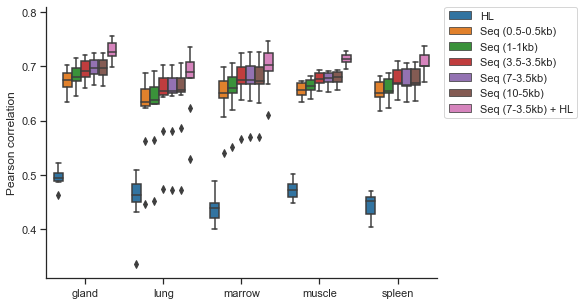

In [6]:
matplotlib.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks")
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=[7,5])
g = sns.boxplot(data = corr_input, x='tissue', y='med_corr', hue='input',
           order=['gland', 'lung', 'marrow',
                  'muscle', 'spleen']
           )
sns.despine()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim([0.31,0.81])
plt.xlabel('')
plt.ylabel('Pearson correlation')
plt.show()